In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import neural_network
from sklearn import linear_model
from sklearn import tree
#import graphviz 
import numpy as np
from scipy import stats 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


# Etapa 1: Preprocesamiento

## Cargamos las bases de datos (excel)


In [2]:
#Cargamos las bases de datos

db_displasia = pd.read_excel('SMD.xls')


db_hepatopata = pd.read_excel('Hepatopata.xls')


db_oncologicos = pd.read_excel('Oncologicos.xls')


db_PTI = pd.read_excel('PTI.xls')

## Informacion de cada una de las db


In [3]:
#Informacion SMD
db_displasia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(9), object(8)
memory usage: 358.4+ KB


In [4]:
#Informacion Hepatopata
db_hepatopata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 88 columns):
LEU      342 non-null float64
NEU      342 non-null float64
NEUp     342 non-null float64
LIN      342 non-null float64
LINp     342 non-null float64
MON      342 non-null float64
MONp     342 non-null float64
EOS      342 non-null float64
EOSp     342 non-null float64
BAS      342 non-null float64
BASp     342 non-null float64
IG       342 non-null float64
IGp      342 non-null float64
ERIT     342 non-null float64
HGB      342 non-null float64
HCT      342 non-null float64
VCM      342 non-null float64
HCM      342 non-null float64
CHCM     342 non-null float64
RDW      342 non-null object
ERBL     342 non-null float64
ERBLp    342 non-null float64
RET      49 non-null float64
RETp     49 non-null float64
FRI      49 non-null float64
RETHE    49 non-null float64
PLT      341 non-null float64
VPM      342 non-null object
IPF      234 non-null float64
HIPER    49 non-null float64
HY

In [5]:
#Informacion oncologicos
db_oncologicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 88 columns):
LEU      303 non-null float64
NEU      303 non-null float64
NEUp     303 non-null float64
LIN      303 non-null float64
LINp     303 non-null float64
MON      303 non-null float64
MONp     303 non-null float64
EOS      303 non-null float64
EOSp     303 non-null float64
BAS      303 non-null float64
BASp     303 non-null float64
IG       303 non-null float64
IGp      303 non-null float64
ERIT     303 non-null float64
HGB      303 non-null float64
HCT      303 non-null float64
VCM      303 non-null float64
HCM      303 non-null float64
CHCM     303 non-null float64
RDW      303 non-null float64
ERBL     303 non-null float64
ERBLp    303 non-null float64
RET      82 non-null float64
RETp     82 non-null float64
FRI      82 non-null float64
RETHE    82 non-null float64
PLT      302 non-null float64
VPM      303 non-null object
IPF      82 non-null float64
HIPER    82 non-null float64
HY

In [6]:
#Informacion PTI
db_PTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(10), object(7)
memory usage: 172.8+ KB


## Limpieza de variables bajo supervision clinica y codificacion de etiquetas

In [7]:

db_smd = db_displasia.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [8]:
#Añadimos una nueva variable que identifique la patologia (SMD --> 0)

db_smd['Diagnosis']=np.zeros((417,1),dtype=np.int8)

In [9]:
db_hpt = db_hepatopata.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [10]:
#Añadimos una variable que identifique el diagnostico (HPT --> 1)
db_hpt['Diagnosis']=np.ones((342,1),dtype=np.int8)

In [11]:
db_onc = db_oncologicos.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [12]:
#Añadimos una variable que identifique el diagnostico (ONC --> 2)
db_onc['Diagnosis']=np.full((303,1),2)

In [13]:

db_pti = db_PTI.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [14]:
#Añadimos una variable que identifique el diagnostico
db_pti['Diagnosis']=np.full((201,1),3)

## Fusionamos las bases de datos y representamos diagrama de cajas y bigotes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 50 columns):
LEU          1263 non-null float64
NEU          1262 non-null float64
LIN          1262 non-null float64
MON          1262 non-null float64
EOS          1262 non-null float64
BAS          1262 non-null float64
IG           1262 non-null float64
ERIT         1263 non-null float64
HGB          1263 non-null float64
HCT          1263 non-null float64
VCM          1263 non-null float64
HCM          1263 non-null float64
CHCM         1263 non-null float64
ERBL         1263 non-null float64
PLT          1257 non-null float64
MacR         1263 non-null float64
MicR         1263 non-null float64
NE_R         1262 non-null float64
LY_R         1262 non-null float64
MO_R         1262 non-null float64
EO_R         1262 non-null float64
BA_R         1262 non-null float64
BA-D#        1262 non-null float64
BA-N#        1262 non-null float64
HFLCA        1262 non-null float64
HFLCP        1262 n

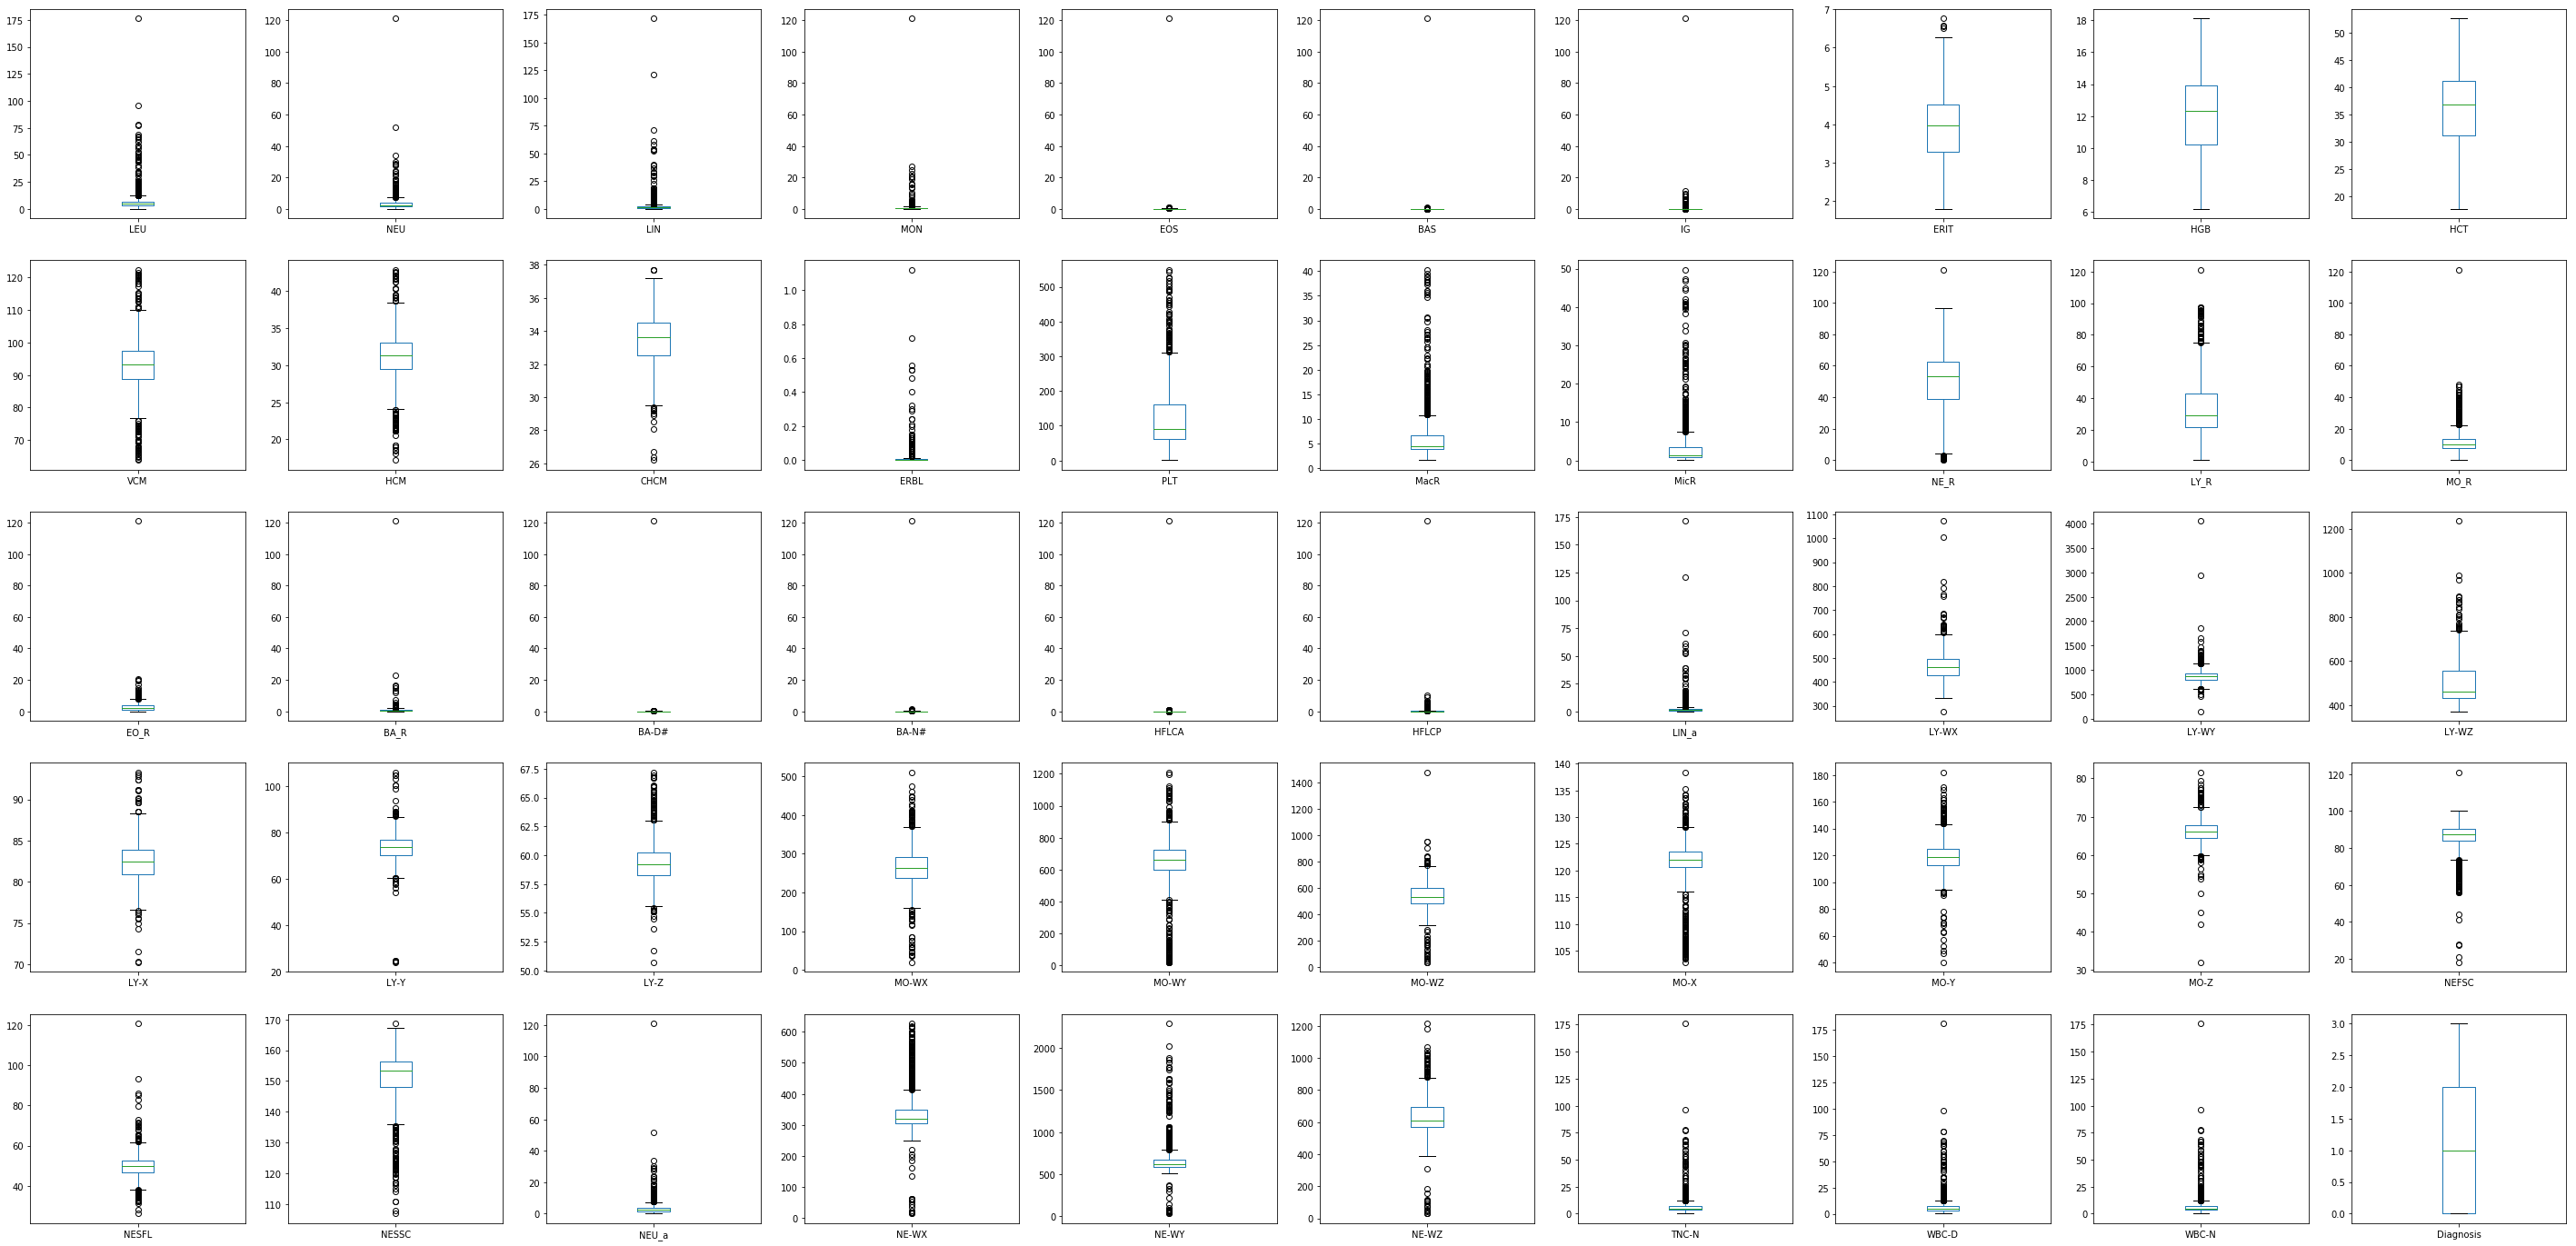

In [15]:
db_final = pd.concat([db_smd,db_hpt,db_onc,db_pti])

db_final.info()

db_final = db_final.replace(np.nan ,np.mean(db_final['PLT']))




db_final.plot(kind='box',subplots=True, layout= (10,10), sharex= False, sharey = False, figsize = (50,50))
plt.show()

## Opcional: Eliminar los outliers utilizando z-score

In [16]:
#Obtenemos z-score

z = np.abs(stats.zscore(db_final))


#Establecemps un umbral 

threshold = 2
pos = np.where(z >threshold)

#Eliminamos los outliers identificados por z-score 

db_final = db_final[(z < threshold).all(axis=1)]

## Aleatorizamos y realizamos las particiones (Train y Validacion)

In [17]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

## Cargamos las bases de datos de Test (una por patologia)

In [18]:
db_displasia_test = pd.read_excel('smdtest.xls')


db_hepatopata_test = pd.read_excel('hpttest.xls')


db_oncologicos_test = pd.read_excel('oncotest.xls')


db_PTI_test = pd.read_excel('ptitest.xls')

## Limpieza de variables en test bajo supervision clinica y codificacion de etiquetas

In [47]:
db_smd_test = db_displasia_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_smd_test['Diagnosis']=np.zeros((10,1),dtype=np.int8)

db_hpt_test = db_hepatopata_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_hpt_test['Diagnosis']=np.ones((19,1),dtype=np.int8)


db_onc_test = db_oncologicos_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_onc_test['Diagnosis']=np.full((19,1),2,dtype=np.int8)

db_pti_test = db_PTI_test.drop(['Número','Fecha','Código Externo','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_pti_test['Diagnosis']=np.full((4,1),3,dtype=np.int8)


# Etapa 2: Machine Learning (Regresion logistica, Knn y Perceptron multicapa)

## Estandarizador y entradas estandarizadas (se aplicara en caso necesario)

In [20]:
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## Regresion logistica (Modelo)

In [21]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']
y_vals = np.eye(len(set(y)))[y]

x_train,x_test,y_train,y_test = train_test_split(x,y_vals, test_size=0.2)

In [22]:
x = tf.placeholder(tf.float32, [None, 49])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([49, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension
y_test_cls = np.array([label.argmax() for label in y_test])

In [23]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
#cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cross_entropy)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Regresion logistica (Entrenamiento)

In [24]:
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train, y_true: y_train}

        session.run(optimizer, feed_dict=feed_dict_train)

## Regresion logistica (Validacion)

In [25]:
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test,
                  y_true: y_test,
                  y_true_cls: y_test_cls}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[10  0  0 13]
 [ 0  0  0 61]
 [ 3  0  0 35]
 [ 0  0  0 20]]
Accuracy on test-set: 21.1%


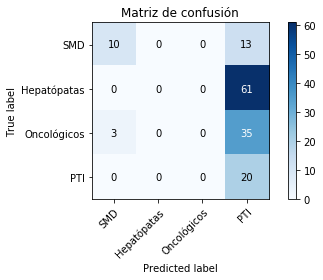

In [26]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()

## Knn (Modelo)

In [27]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']

# Realizamos One-hot-encoding de las etiquetas
y_vals = np.eye(len(set(y)))[y]

x_train,x_test,y_train,y_test = train_test_split(x,y_vals, test_size=0.2, random_state=7)


scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# obtenemos las etiquetas del test como valores 0,1,2 y 3, ya que estaban codificadas.

y_test_cls = np.array([label.argmax() for label in y_test])

In [28]:
# Creacion del modelo knn
x_data_train = tf.placeholder(shape=[None, 49], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, 4], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, 49], dtype=tf.float32)

## Knn (distancia Manhattan)

cv_k_Scores: [0.7394366197183099, 0.7394366197183099, 0.7605633802816901, 0.7323943661971831, 0.7183098591549296, 0.7112676056338029, 0.7323943661971831, 0.7323943661971831, 0.7112676056338029, 0.7183098591549296]
10
10


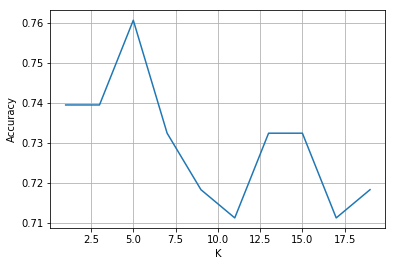

El valor óptimo de vecinos cercanos es: 5
El máximo valor de accuracy es: 0.7605633802816901


In [29]:
#Validacion cruzada para obtener una buena capacidad de generalizacion

k_values = range(1,21,2)
cv_k_scores = []

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))


Se implementa la distancia Manhattan:valor absoluto de la diferencia entre los valores del vector de dos puntos de datos de x1 y x2.
El comando 'tf.expand_dims' añade una dimension extra a 'x_data_test' para que se puede llevar a cabo la resta.

In [30]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

Reemplazamos el valor de k que hemos obtenido tras realizar validación cruzada.

In [31]:
k = 5

# k puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

- Con la funcion 'tf.nn.top_k()', se obtienes los mayores valores y los índices de KNN. El primer valor de retorno, son los valores de las distancias y por lo tanto se descartan ya que la función 'tf.negative()' hace que los valores sean negativos.


- Con la función 'tf.gather()' extraemos las etiquetas de entrenamiento asociadas a los índices de los vecinos más cercanos. Por tanto, top_k_label son las etiquetas codificadas.


- Con la función 'tf.reduce_sum()', se obtiene la suma de elementos.


- Con la funcion 'tf.argmax()' se obtienen las etiquetas predichas ya que con esta función se obtiene el índice del valor máximo.

## Knn (Manhattan) - Entrenamiento

In [32]:
sess = tf.Session()
# Obtenemos las predicciones
prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})

## Knn (Manhattan) - Validacion

In [33]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[12  3  1  1]
 [ 3 46  3  2]
 [ 3 11 32  3]
 [ 0  3  1 18]]


In [34]:
accuracy = 0
for pred, actual in zip(prediction_outcome, y_test):
    if pred == np.argmax(actual):
        accuracy += 1
print(accuracy / len(prediction_outcome))

0.7605633802816901


## Knn (Euclidea)

En este punto, se realiza validación cruzada tomando como medida de distancia la euclídea, ya que sabemos que KNN es sensible a la distancia que se considere (los vecinos cercanos pueden cambiar).

cv_k_Scores: [0.7183098591549296, 0.7183098591549296, 0.7183098591549296, 0.7253521126760564, 0.7112676056338029, 0.7394366197183099, 0.7394366197183099, 0.7253521126760564, 0.7183098591549296, 0.7183098591549296]
10
10


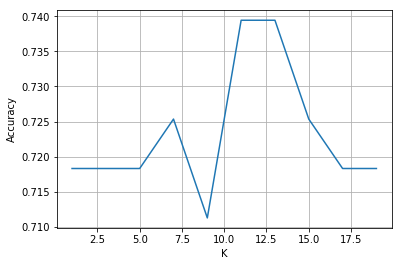

El valor óptimo de vecinos cercanos es: 11
El máximo valor de accuracy es: 0.7394366197183099


In [35]:
k_values = range(1,21,2)
cv_k_scores = []

# Definimos la distancia euclidea
euclidian_distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), axis=2))


for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))

Hemos obtenido como valor óptimo de vecinos cercanos el valor 7, por tanto creamos el modelo con este valor de k.

In [36]:
k = 7

# K puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

## Knn (Euclidea) - Entrenamiento

In [37]:
sess = tf.Session()
prediction_outcome_d2 = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train,
                               x_data_test: x_test,
                               y_data_train: y_train})

## Knn (Euclidea) - Validacion

In [38]:
# Matriz de confusión 

con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome_d2 )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[12  2  2  1]
 [ 1 43  6  4]
 [ 3 12 31  3]
 [ 0  4  1 17]]


In [39]:
# Obtenemos la tasa de acierto
accuracy_d2 = 0
for pred, actual in zip(prediction_outcome_d2, y_test):
    if pred == np.argmax(actual):
        accuracy_d2 += 1
print('Tasa de acierto:',accuracy_d2 / len(prediction_outcome_d2))

Tasa de acierto: 0.7253521126760564


## Red neuronal : Perceptron multicapa

In [41]:
# Crearemos una serie de capas de neuronas secuenciales
model = Sequential()

# Capa de entrada con 49 neuronas
# La primera capa oculta tiene 16 neuronas
model.add(Dense(16, input_dim=49, activation='relu'))
model.add(Dense(8, activation='relu'))


# Agregamos una capa con 4 neuronas de salida y función de activación sigmoide
model.add(Dense(4, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [42]:
# Función de pérdida: binary_crossentropy, optimizador= adam, definimos exactitud como métrica

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, epochs=100, batch_size=20, validation_split=0.1)

Train on 508 samples, validate on 57 samples
Epoch 1/100
508/508 [==============================] - 0s 900us/step - loss: 0.6770 - accuracy: 0.5709 - val_loss: 0.6619 - val_accuracy: 0.6272
Epoch 2/100
508/508 [==============================] - 0s 44us/step - loss: 0.6325 - accuracy: 0.6417 - val_loss: 0.6207 - val_accuracy: 0.6842
Epoch 3/100
508/508 [==============================] - 0s 37us/step - loss: 0.5942 - accuracy: 0.6924 - val_loss: 0.5812 - val_accuracy: 0.7149
Epoch 4/100
508/508 [==============================] - 0s 38us/step - loss: 0.5546 - accuracy: 0.7288 - val_loss: 0.5382 - val_accuracy: 0.7763
Epoch 5/100
508/508 [==============================] - 0s 37us/step - loss: 0.5163 - accuracy: 0.7657 - val_loss: 0.5000 - val_accuracy: 0.7939
Epoch 6/100
508/508 [==============================] - 0s 35us/step - loss: 0.4829 - accuracy: 0.7849 - val_loss: 0.4658 - val_accuracy: 0.7982
Epoch 7/100
508/508 [==============================] - 0s 39us/step - loss: 0.4542 - accur

508/508 [==============================] - 0s 37us/step - loss: 0.1352 - accuracy: 0.9478 - val_loss: 0.4792 - val_accuracy: 0.8465
Epoch 58/100
508/508 [==============================] - 0s 31us/step - loss: 0.1337 - accuracy: 0.9488 - val_loss: 0.4843 - val_accuracy: 0.8509
Epoch 59/100
508/508 [==============================] - 0s 38us/step - loss: 0.1315 - accuracy: 0.9493 - val_loss: 0.4901 - val_accuracy: 0.8509
Epoch 60/100
508/508 [==============================] - 0s 38us/step - loss: 0.1304 - accuracy: 0.9488 - val_loss: 0.4907 - val_accuracy: 0.8465
Epoch 61/100
508/508 [==============================] - 0s 34us/step - loss: 0.1280 - accuracy: 0.9503 - val_loss: 0.4970 - val_accuracy: 0.8509
Epoch 62/100
508/508 [==============================] - 0s 37us/step - loss: 0.1263 - accuracy: 0.9498 - val_loss: 0.5009 - val_accuracy: 0.8465
Epoch 63/100
508/508 [==============================] - 0s 37us/step - loss: 0.1246 - accuracy: 0.9513 - val_loss: 0.5018 - val_accuracy: 0.850

In [44]:
# Evaluamos en el conjunto de entrenamiento
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

565/565 [==============================] - 0s 11us/step

accuracy: 95.93%


In [45]:
# Evaluamos el modelo en el conjunto de validacion
print('\n# Evaluación en el conjunto de test')
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Obtenemos las predicciones
predictions_mlp_codif = model.predict(x_test).round()

# Obtenemos las predicciones con valores 0,1,2 y 3 ya que estaban codificadas
predictions_mlp = np.array([label.argmax() for label in predictions_mlp_codif])

#print(predictions_mlp)


# Evaluación en el conjunto de test
142/142 [==============================] - 0s 27us/step

accuracy: 86.97%


In [46]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=predictions_mlp )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[14  1  2  0]
 [ 3 43  5  3]
 [ 7  8 31  3]
 [ 5  0  2 15]]


## Red neuronal sobre bases de datos TEST

In [48]:
# Para obtener las predicciones eliminamos el diagnostico y el identificado de número

x_test_db_smd = db_smd_test.drop(['Diagnosis'], axis=1)
x_test_db_hpt = db_hpt_test.drop(['Diagnosis'], axis=1)
x_test_db_onc = db_onc_test.drop(['Diagnosis'], axis=1)
x_test_db_pti = db_pti_test.drop(['Diagnosis'], axis=1)

In [49]:
# Estandarizamos las bases de datos

x_test_db_smd = scaler.transform(x_test_db_smd)
x_test_db_hpt = scaler.transform(x_test_db_hpt)
x_test_db_onc = scaler.transform(x_test_db_onc)
x_test_db_pti = scaler.transform(x_test_db_pti)

In [51]:
# Probamos con db_smd
predictions_mlp_codif_db_smd = model.predict(x_test_db_smd).round()

# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_smd = np.array([label.argmax() for label in predictions_mlp_codif_db_smd])

print(predictions_mlp_codif_db_smd)

[0 0 2 0 0 0 0 0 0 0]


In [52]:
# Probamos con db_hpt
predictions_mlp_codif_db_hpt = model.predict(x_test_db_hpt).round()

# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_hpt = np.array([label.argmax() for label in predictions_mlp_codif_db_hpt])

print(predictions_mlp_codif_db_hpt)

[0 1 1 2 0 0 1 2 0 0 2 0 1 1 2 2 1 1 1]


In [53]:
# Probamos con x_test_db_onc

predictions_mlp_codif_db_onc = model.predict(x_test_db_onc).round()


# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_onc = np.array([label.argmax() for label in predictions_mlp_codif_db_onc])

print(predictions_mlp_codif_db_onc)


[1 3 1 0 2 2 0 0 0 2 2 1 2 2 2 2 0 1 0]


In [54]:
# Probamos con x_test_db_pti

predictions_mlp_codif_db_pti = model.predict(x_test_db_pti).round()


# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_pti = np.array([label.argmax() for label in predictions_mlp_codif_db_pti])

print(predictions_mlp_codif_db_pti)

[1 3 3 0]


# Etapa 3: Seleccion de caracteristicas

## Metodo de filtrado: Prueba F de Fisher (F)

In [57]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [58]:
#Algoritmo univariante de prueba F

n_variables = 10

selector_f = SelectKBest(f_classif, k= n_variables)

selection_f = selector_f.fit(x_train,y_train)

atrib_matrix_f = selection_f.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_f)

selected_atributes_f = []

for i in range(len(atrib_names)):
    if atrib_matrix_f[i] == True:
        selected_atributes_f.append(atrib_names[i])
        
print(selected_atributes_f)

['LEU' 'NEU' 'LIN' 'MON' 'EOS' 'BAS' 'IG' 'ERIT' 'HGB' 'HCT' 'VCM' 'HCM'
 'CHCM' 'ERBL' 'PLT' 'MacR' 'MicR' 'NE_R' 'LY_R' 'MO_R' 'EO_R' 'BA_R'
 'BA-D#' 'BA-N#' 'HFLCA' 'HFLCP' 'LIN_a' 'LY-WX' 'LY-WY' 'LY-WZ' 'LY-X'
 'LY-Y' 'LY-Z' 'MO-WX' 'MO-WY' 'MO-WZ' 'MO-X' 'MO-Y' 'MO-Z' 'NEFSC'
 'NESFL' 'NESSC' 'NEU_a' 'NE-WX' 'NE-WY' 'NE-WZ' 'TNC-N' 'WBC-D' 'WBC-N']
[ True  True False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False  True  True  True False  True  True
  True]
['LEU', 'NEU', 'PLT', 'NEFSC', 'NEU_a', 'NE-WX', 'NE-WY', 'TNC-N', 'WBC-D', 'WBC-N']


## Metodo de empaquetamiento: Eliminacion recursiva de atributos (ERA)

In [59]:
#Eliminacion recursiva de atributos

selector_elim = ExtraTreesClassifier()

era = RFE(selector_elim, 49)

selection_era = era.fit(x_train, y_train)

atrib_matrix_era = selection_era.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_era)

selected_atributes_era = []

for i in range(len(atrib_names)):
    if atrib_matrix_era[i] == True:
        selected_atributes_era.append(atrib_names[i])
        
print(selected_atributes_era)

['LEU' 'NEU' 'LIN' 'MON' 'EOS' 'BAS' 'IG' 'ERIT' 'HGB' 'HCT' 'VCM' 'HCM'
 'CHCM' 'ERBL' 'PLT' 'MacR' 'MicR' 'NE_R' 'LY_R' 'MO_R' 'EO_R' 'BA_R'
 'BA-D#' 'BA-N#' 'HFLCA' 'HFLCP' 'LIN_a' 'LY-WX' 'LY-WY' 'LY-WZ' 'LY-X'
 'LY-Y' 'LY-Z' 'MO-WX' 'MO-WY' 'MO-WZ' 'MO-X' 'MO-Y' 'MO-Z' 'NEFSC'
 'NESFL' 'NESSC' 'NEU_a' 'NE-WX' 'NE-WY' 'NE-WZ' 'TNC-N' 'WBC-D' 'WBC-N']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
['LEU', 'NEU', 'LIN', 'MON', 'EOS', 'BAS', 'IG', 'ERIT', 'HGB', 'HCT', 'VCM', 'HCM', 'CHCM', 'ERBL', 'PLT', 'MacR', 'MicR', 'NE_R', 'LY_R', 'MO_R', 'EO_R', 'BA_R', 'BA-D#', 'BA-N#', 'HFLCA', 'HFLCP', 'LIN_a', 'LY-WX', 'LY-WY', 'LY-WZ', 'LY-X', 'LY-Y', 'LY-Z', 'MO-WX', 'MO-WY', 'MO-WZ', 'MO-X', 'MO-Y', 'MO-Z', 'NEFSC', 'NESFL', 'NESSC', 'NEU_

# Bases de datos tras seleccion de caracteristicas (F y ERA)

In [70]:
#Base de datos tras F de Fisher

x = db_final.drop(['Diagnosis'],axis=1)
x_f = x[selected_atributes_f]
y_f = db_final['Diagnosis']
y_vals_f = np.eye(len(set(y_f)))[y_f]

x_f.info()
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(x_f,y_vals_f, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 197
Data columns (total 10 columns):
LEU      707 non-null float64
NEU      707 non-null float64
PLT      707 non-null float64
NEFSC    707 non-null float64
NEU_a    707 non-null float64
NE-WX    707 non-null int64
NE-WY    707 non-null int64
TNC-N    707 non-null float64
WBC-D    707 non-null float64
WBC-N    707 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.8 KB


In [71]:
#Base de datos tras ERA
x = db_final.drop(['Diagnosis'],axis=1)
x_era = x[selected_atributes_era]
y_era = db_final['Diagnosis']
y_vals_era = np.eye(len(set(y_era)))[y_era]

x_era.info()
x_train_era,x_test_era,y_train_era,y_test_era = train_test_split(x_era,y_vals_era, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 197
Data columns (total 49 columns):
LEU      707 non-null float64
NEU      707 non-null float64
LIN      707 non-null float64
MON      707 non-null float64
EOS      707 non-null float64
BAS      707 non-null float64
IG       707 non-null float64
ERIT     707 non-null float64
HGB      707 non-null float64
HCT      707 non-null float64
VCM      707 non-null float64
HCM      707 non-null float64
CHCM     707 non-null float64
ERBL     707 non-null float64
PLT      707 non-null float64
MacR     707 non-null float64
MicR     707 non-null float64
NE_R     707 non-null float64
LY_R     707 non-null float64
MO_R     707 non-null float64
EO_R     707 non-null float64
BA_R     707 non-null float64
BA-D#    707 non-null float64
BA-N#    707 non-null float64
HFLCA    707 non-null float64
HFLCP    707 non-null float64
LIN_a    707 non-null float64
LY-WX    707 non-null int64
LY-WY    707 non-null int64
LY-WZ    707 non-null int64
L

## Seleccion de caracteristicas : Regresion logistica

In [103]:
#Crear modelo
x = tf.placeholder(tf.float32, [None, 49])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([49, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension

y_test_cls_f = np.array([label.argmax() for label in y_test_f])
y_test_cls_era = np.array([label.argmax() for label in y_test_era])

In [ ]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
#cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cross_entropy)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [96]:
#Entrenamiento con F de Fisher
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train_f, y_true: y_train_f}

        session.run(optimizer, feed_dict=feed_dict_train)


In [97]:
#Validacion con F de Fisher
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test_f,
                  y_true: y_test_f,
                  y_true_cls: y_test_cls_f}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls_f

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [99]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()


ValueError: Cannot feed value of shape (565, 10) for Tensor 'Placeholder_20:0', which has shape '(?, 49)'